In [1]:
%reload_ext watermark
%reload_ext autoreload
%autoreload 2
%watermark -v -p numpy,sklearn,pandas
%watermark -v -p cv2,PIL,matplotlib
%watermark -v -p torch,torchvision,torchaudio
%watermark -v -p tensorflow,tensorboard
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config IPCompleter.use_jedi = False

from IPython.display import display, Markdown, HTML, Javascript
display(HTML('<style>.container { width:%d%% !important; }</style>' % 80))

import sys, os, io, time, random, math
import json, base64, requests
import os.path as osp
import numpy as np

def _IMPORT_(x):
    try:
        segs = x.split(' ')
        g = globals()
        if 'github.com' in segs[1]:
            uri = segs[1].replace('github.com', 'raw.githubusercontent.com')
            mod = uri.split('/')
            for s in ['main', 'master']:
                uri = 'https://' + '/'.join(mod[:-1]) + '/main/' + mod[-1] + '.py'
                x = requests.get(uri).text
                if x.status == 200:
                    break
        elif 'gitee.com' in segs[1]:
            mod = segs[1].split('/')
            for s in ['/raw/main/', '/raw/master/']:
                uri = 'https://' + '/'.join(mod[:3]) + s + '/'.join(mod[3:]) + '.py'
                x = requests.get(uri).text
                if x.status == 200:
                    break
        elif segs[1][0] == '/':
            with open(segs[1] + '.py') as fr:
                x = fr.read()
        exec(x, g)
    except:
        pass


CPython 3.6.9
IPython 7.16.1

numpy 1.19.5
sklearn 0.24.0
pandas 1.1.5
CPython 3.6.9
IPython 7.16.1

cv2 4.5.1
PIL 6.2.2
matplotlib 3.3.3
CPython 3.6.9
IPython 7.16.1

torch 1.8.0.dev20210103+cu101
torchvision 0.9.0.dev20210103+cu101
torchaudio not installed
CPython 3.6.9
IPython 7.16.1

tensorflow 2.6.0
tensorboard 2.6.0


In [2]:
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np

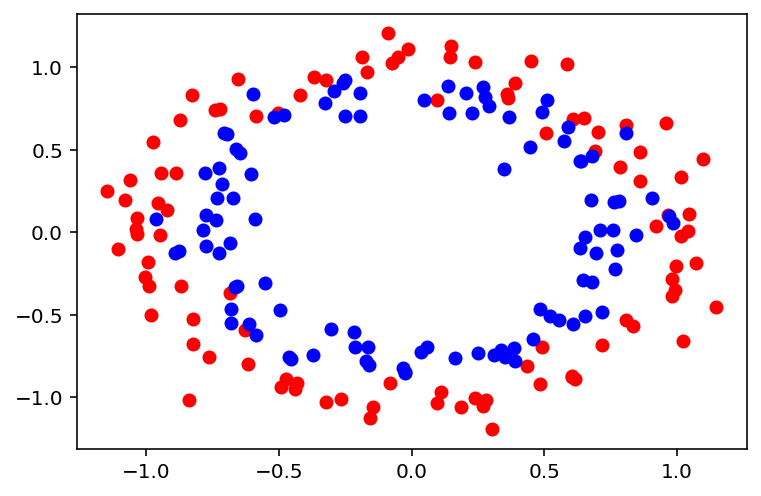

In [5]:
# 生成模拟数据(圆形)
def create_dataset(n_train, n_test=1000, noise=0.1):
    n_samples = n_train + n_test
    X, y = make_circles(n_samples=n_samples, noise=noise, random_state=1)
    X_train, X_test = X[n_test:, :], X[:n_test, :]
    y_train, y_test = y[n_test:], y[:n_test]
    return X_train, X_test, y_train, y_test

# 显示数据集样例
X, _, y, _ = create_dataset(n_train=200, n_test=1)
y0_idx, y1_idx = np.where(y == 0), np.where(y == 1)

plt.scatter(X[y0_idx, 0], X[y0_idx, 1], color='red');
plt.scatter(X[y1_idx, 0], X[y1_idx, 1], color='blue');

In [4]:
# 感知机模型训练&评估 (分类红色和蓝色点)
def evaluate_model(X_train, X_test, y_train, y_test):
    model = Sequential()
    model.add(Dense(25, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return test_acc

def evaluate_size(n_train, n_repeats=5):
    X_train, X_test, y_train, y_test = create_dataset(n_train)
    scores = list()
    for _ in range(n_repeats):
        score = evaluate_model(X_train, X_test, y_train, y_test)
        scores.append(score)
    return scores

# 分别使用不同的数据大小训练, 观察分类正确率
sizes = [100, 900]
score_sets, means = list(), list()
for n_train in sizes:
    scores = evaluate_size(n_train)
    score_sets.append(scores)
    mean_score = np.mean(scores)
    means.append(mean_score)
    print('Train Size=%d, Test Accuracy %.3f' % (n_train, mean_score*100))

Train Size=100, Test Accuracy 55.200
Train Size=900, Test Accuracy 81.520
